<a href="https://colab.research.google.com/github/Jieoi/traffic_sign_recognition/blob/main/train_data_preparation_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: This instance of Google Colab has been configured to use the High-RAM CPU (51GB RAM). It is possible to run all other sections except the section *1.3 data processing* which requires 15GB usable RAM.

Note: The code below has been configured to run on Google colab with python scripts imported from google drive. Please download the scripts from [here](https://drive.google.com/drive/folders/1nViTcpc952b0ftRGqkDBFqbSEC01t0a8). Files required including all scripts and helper files under data_preparation folder and data_augmentation folder. Alternatively, vist my github repository to [download](https://github.com/Jieoi/traffic_sign_recognition/tree/main) the scripts and helper files.

<h2>1. Training data preparetion using simple filters</h2>

<h2>1.1 Data extraction</h2>

Firstly, the dataset is obtained from [here](https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html), the German Traffic Sign Recognition Benchmark GTSRB dataset. The file downloaded includes training images with lable, test images, and ground truth for the test images.

The path to the dataset is loaded below, the code has been modified to link to the downloaded dataset from my Google drive.

In [21]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


The following code is used to remove the directory(ies) created from the previouse excution

In [22]:
import shutil
import os

# List of directories to be deleted
directories_to_delete = [
    '/content/augmented_images'
]

# Iterate through the list of directories and delete them
for directory_to_delete in directories_to_delete:
    if os.path.exists(directory_to_delete):
        shutil.rmtree(directory_to_delete)
        print(f"Directory '{directory_to_delete}' and its contents have been deleted.")
    else:
        print(f"Directory '{directory_to_delete}' does not exist.")


Directory '/content/augmented_images' does not exist.


Libraries are included for simple data visualisation and data enhancement as well as augmentation

In [23]:
# system/file handling in google drive
import sys

# Variouse calculations
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Image processing
import cv2

# Data handling and manipulation
import pandas as pd

Python script helper files has being prepared to import the the data from the google drive. These python file has being developed using <b>Test driven development</b> methodology.
> The <b>getFile.py and getData.py</b> has been modified to read the data from the google drive.

> The <b>testGetData.py and testGetFile.py</b> has been developed to test the function.

Firstly, the test file is deployed and checked. Then, the helper files are imported for data extraction.



Test file for getFile.py is deployed and checked

In [24]:
# Define the path to the testgetFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/testGetFile.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

In [25]:
!python drive/MyDrive/final/data_preparation/testGetFile.py

.Extraction complete.
....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


Test file for getFile.py is deployed and checked

In [26]:
# Define the path to the getData.py script
script_path = '/content/drive/MyDrive/final/data_preparation/testGetData.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

In [27]:
!python drive/MyDrive/final/data_preparation/testGetData.py

Loaded 258 images and 258 labels in 0.06379318237304688 seconds.
..Loaded 5 test images in 0.0004000663757324219 seconds.
.
----------------------------------------------------------------------
Ran 3 tests in 0.492s

OK


As the raw data downloaded from GTSRB is in zip format, the data is extracted using the <b>extract_zip_to_directory</b> function from <b>getFile.py</b>.

In [28]:
# Import the extract_zip_to_directory function from getFile.py
from getFile import extract_zip_to_directory

# Define file paths
root_path = '/content/drive/MyDrive'
zip_filename = os.path.join(root_path, 'GTSRB/GTSRB.zip')
extract_dir = "/content/GTSRB"

# Call the function
extract_zip_to_directory(zip_filename, extract_dir)

Extraction complete.


In [29]:
# Assign the paths
train_directory = os.path.join(extract_dir, 'GTSRB', 'GTSRB-Training_fixed', 'GTSRB', 'Training')

print("train_directory:", train_directory)

train_directory: /content/GTSRB/GTSRB/GTSRB-Training_fixed/GTSRB/Training


The original data contains both training and testing files as well as their ground truth. For this instance of collab, only the training data is used. Thus load_and_process_training_images function is called to load and process the training images as well as their labels. The training images were in ppm format while the ground truth was in csv format. The code has been modified to link to the downloaded dataset from my Google drive. The file can be found from [here](https://drive.google.com/drive/folders/1hEFO5fCQcCJ9YBwAbsh1gzDXOmIvUmor).

In [30]:
# Import the load_and_process_training_images function from getData.py
script_path = '/content/drive/MyDrive/final/data_preparation/getData.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

import getData

In [31]:
images, labels = getData.load_and_process_training_images(train_directory)

# Now you can work with the 'images' and 'labels' variables
# For example:
print("Number of images:", len(images))
print("Number of labels:", len(labels))

Loaded 26640 images and 26640 labels in 2.6094043254852295 seconds.
Number of images: 26640
Number of labels: 26640


<h2> 1.2 Simple statictics</h2>

Simple statistics of the training dataset is calculated below

In [32]:
# Get all instance of unique labels
unique_labels, label_counts = np.unique(labels, return_counts=True)
label_distribution = dict(zip(unique_labels, label_counts))

# Extract labels and counts from the label distribution dictionary
labels_list = list(label_distribution.keys())
counts = list(label_distribution.values())

# Sort labels and counts by label names
sorted_indices = np.argsort(labels_list)
labels_list = np.array(labels_list)[sorted_indices]
counts = np.array(counts)[sorted_indices]

In [33]:
# Calculate statistics
total_images = sum(counts)
average_images = total_images / len(unique_labels)
median_images = np.median(counts)
std_deviation = np.std(counts)
min_index = np.argmin(counts)
max_index = np.argmax(counts)

# Get labels for minimum and maximum values
min_label = labels_list[min_index]
max_label = labels_list[max_index]
min_images = counts[min_index]
max_images = counts[max_index]


# Print statistics
print(f"Average number of images per label: {average_images:.2f}")
print(f"Median number of images per label: {median_images}")
print(f"Standard deviation of images per label: {std_deviation:.2f}")
print(f"Minimum number of images: {min_images} for label '{min_label}'")
print(f"Maximum number of images: {max_images} for label '{max_label}'")

Average number of images per label: 619.53
Median number of images per label: 420.0
Standard deviation of images per label: 457.35
Minimum number of images: 150 for label '0'
Maximum number of images: 1500 for label '1'


It was noted that the distribution of images per label is not uniform. There is a large difference in the number of images per label. The maximum number of images is 1500 while the minimum number of images is 150. The avaergae number of images per label is 619.53. This indicates that there is a very <b>wide spread of data</b>.



Thus, a simple bar plot is created to show the distribution of labels as below. This can better visualise the distribution of data and allow for better understanding of the data. It will serve as an indicator to weather there is a need to <b>augment the data</b> and the kind of <b>evaluation matrics</b> to be used in the future.

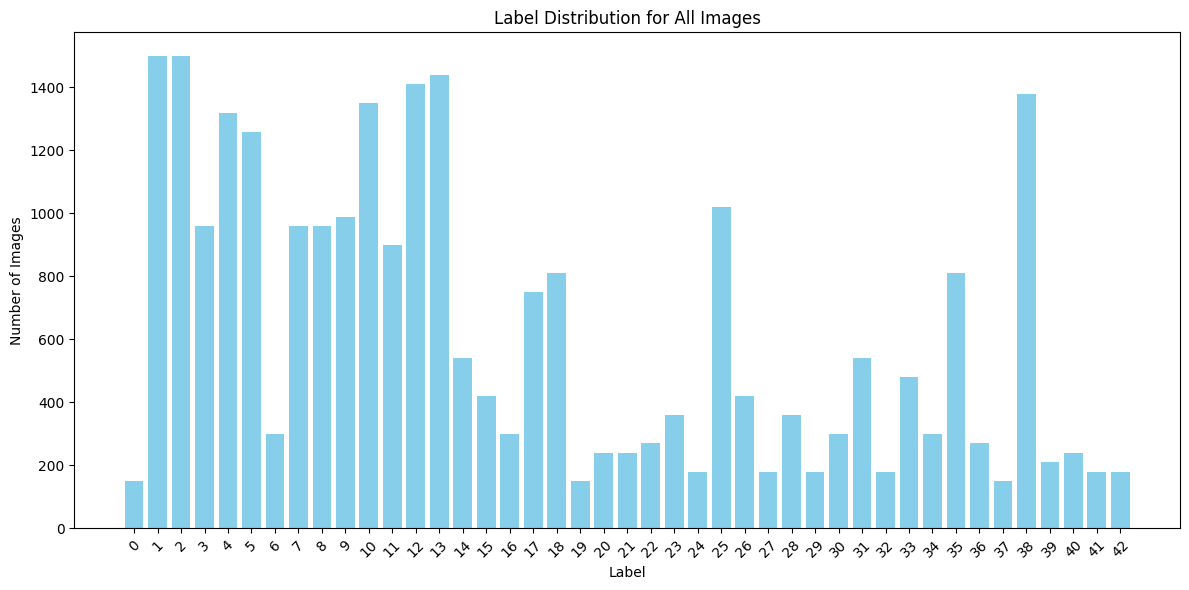

In [34]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels_list, counts, tick_label=labels_list, color='skyblue')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Label Distribution for All Images')
plt.xticks(labels_list, rotation=45)
plt.tight_layout()

plt.show()

The graph above indicates that the dispertion of data is very significant. As the data is largely unbalanced, the following decision were made:



1.   **Data augmentation** is required to increase the number of images. The classes with lesser image than the avaerage (619.53) woll be augmented.
Augmentation technics will be discussed in the next section and based on the shape of the traffic signs.

2.   The **evaluation metrics** used for the machine learning will put strong emphasis on the F1 score. This will act as a balanced matrics between accuracy and precision. This is widely used for unbalanced dataset.

Moreover, the augmentation will not generate images such that all classes has the same number of images as the **difference** between the smallest class and the largest class is **too big** (1500 - 150).


A visualisation of the traffic signs of each label is shown below.

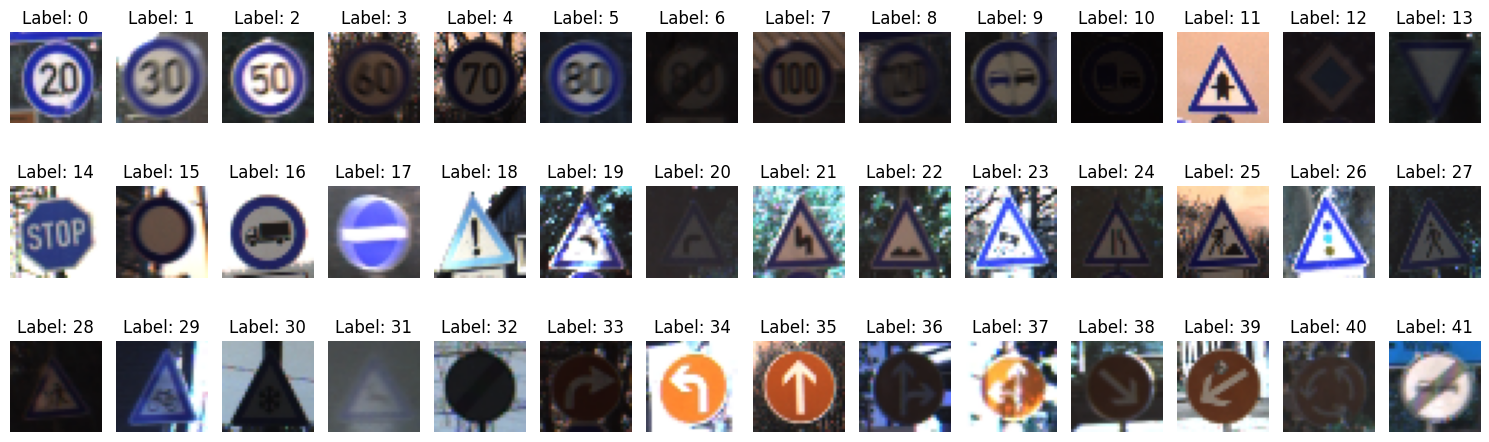

In [35]:
# Display one image from each label
num_rows = 3
num_columns = 14
num_images_to_display = num_rows * num_columns

# Create a figure with the desired number of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))

for i, ax in enumerate(axes.flat):
    if i < len(np.unique(labels)):
        label = np.unique(labels)[i]
        label_indices = np.where(labels == label)[0]

        # Check if there are still unselected images for this label
        if label_indices.size > 0:
            random_index = label_indices[0]  # Select the first unselected image
            label_indices = label_indices[1:]  # Remove the selected image index

            ax.imshow(images[random_index])
            ax.set_title(f"Label: {label}")
            ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

It was realised that the traffic signs were of different shapes and sizes. However, there are signs such as **turning left and right** . Augmentation technics will thus **not be including flipping** of the images. This is due to the fact that flipping may result in a **confusion between left and right turning**.

<h2> 1.3 Data Processing </h2>

Note: **Minimum required RAM for image denoising is 15GB**. Please deploy this section on a machine with 15GB usable RAM.

Images are first upscaled using bicubic interpolation for simple enlargement. The images are then equalized using histogram equalization and then denoised using fast Non-Local Means Denoising for coloured images. Lastly, the images are passed through Gaussian smoothing.

This ensures a balance between the image quality and computational efficiency.

In [36]:
# Define the path to the processing_image.py script
script_path = '/content/drive/MyDrive/final/data_augmentation/processing_image.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

import processing_image

 <h3>bicubic interpolation upscaling, histogram equalization and denoising:</h3>

As the traffic signs were all of a very small size and resolution, it was decided to upscale it first before carry on to the other steps.

As the denoised processing is computationally expensive, the images are passed through **parallel processing**. Still, it thats quite a long time to be excuted. Thus, a message is sent from the program similar to the **heartbeat** to check if the program is still running and the delay is not due to internet connection.

Note: %%capture is used to surpress the print out in the submitted version. Comment out to show the printing

In [37]:
# surpress heartbeat std output by the denoising function
%%capture
# Convert data to unit8
class_images = processing_image.convert_image_format(images)

# Call the equalize_images function
equalized_images = processing_image.equalize_images(class_images)

# Call the fast non local denoising function with the converted images
denoised_images = processing_image.denoise_images_parallel(equalized_images)

In [46]:
# Call the guassian_smoothing function
smoothed_images = processing_image.gaussian_smoothing(denoised_images)

A visualisation of one of the images is shown below as it passes through every steps in the image enhancement pipeline. This is served as an example of the pipeline.

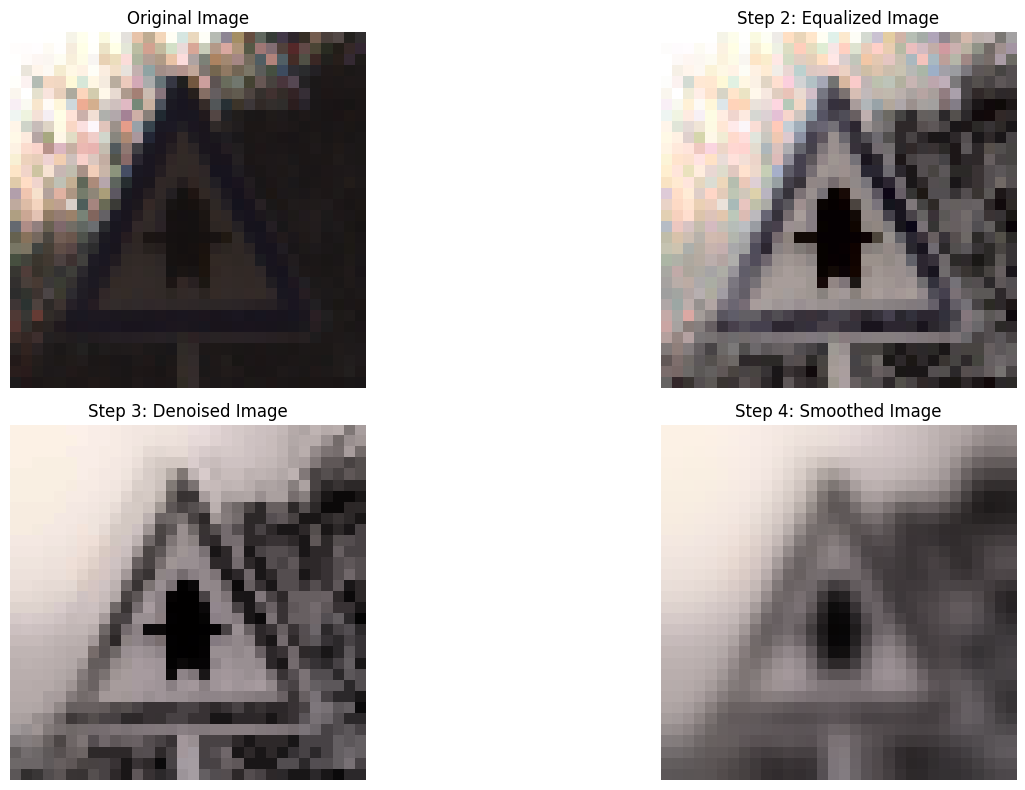

In [50]:
# Display the original image, upscaled image, equalized image, denoised image, and smoothed image
plt.figure(figsize=(16, 8))

idx = 10000
# Original Image
plt.subplot(2, 2, 1)
plt.imshow(images[idx])
plt.title("Original Image")
plt.axis("off")

# Equalized Image
plt.subplot(2, 2, 2)
plt.imshow(equalized_images[idx])
plt.title("Step 2: Equalized Image")
plt.axis("off")

# Denoised Image
plt.subplot(2, 2, 3)
plt.imshow(denoised_images[idx])
plt.title("Step 3: Denoised Image")
plt.axis("off")

# Smoothed Image
plt.subplot(2, 2, 4)
plt.imshow(smoothed_images[idx])
plt.title("Step 4: Smoothed Image")
plt.axis("off")

plt.tight_layout()
plt.show()


Based on the images above, it is obviouse that the upscaled images significantly improved the resolution of the images. Then, the contrast of the images were greatly improved in the equalized images. Next, the noised were removed and leaving a much cleaner image. Lastly, the images were smoothed, as the edges of the patterns were less obvious. This may not be helpful for the  image recognistion by detecting the edges and colours as features. Thus, the resultant images to be used will be the denoised images array.

It can be calculated that the denoised images had a lower standard deviation and median absolute deviation than the original images. Indicating that the denoised images had less noise present.

A lower Median Absolute Deviation (MAD) and a lower standard deviation suggest that the pixel values in the image are closer to the central tendency, indicating that there is less variation or spread in the pixel values. This suggests that the processed images have less noise present.

<h3>Data augmentation</h3>

The shape of the image array is checked below to prepare for the data augmentation.

In [ ]:
denoised_images.shape

(26640, 32, 32, 3)

It was noted from the code in the simple statistic analysis that the avaerage number of images per label is **619.53**. Thus the desired number of images per label is set to be **620.** The empty lists are created to store the augmented images and labels.

In [ ]:
# Calculate the desired number of images per class
desired_images_per_class = 620

# Loop through each class
unique_labels = np.unique(labels)
augmented_images = []
augmented_labels = []

The unique_labels will be used to select the images belonging to each class. Then, the number of images needed to be augmented will be calculated by **subtracting the desired number of images per class**. It is set to 0 if the number of images is more than the desired number.

Then, the images will be augmented using the apply_augmentations function defined in the processing_image.py script. A **random image** is selected from the classes which requires augmentation **until the desired number** of images is met. The images are then appended to the augmented_images list and the labels are appended to the augmented_labels list.

In [ ]:
trail = denoised_images

In [ ]:
for label in unique_labels:
    # Select images belonging to the current class
    class_indices = np.where(labels == label)[0]
    class_images = denoised_images[class_indices]

    # Calculate how many images need to be augmented
    images_needed = max(0, desired_images_per_class - class_images.shape[0])

    # Augment existing images to meet the desired count
    for _ in range(images_needed):
        # Randomly select an index from the existing images
        random_index = np.random.randint(0, class_images.shape[0])

        # Select the image to be augmented
        image_to_augment = class_images[random_index]

        # Apply augmentation techniques using OpenCV
        augmented_image = processing_image.apply_augmentations(image_to_augment)

        # Append augmented image and label to the lists
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenate augmented images and original images
final_images = np.concatenate((denoised_images, augmented_images), axis=0)
final_labels = np.concatenate((labels, augmented_labels), axis=0)

Finally, the shape of the final_images array is shown below. It contains both original and augmented images. Each image sized 96 by 96 pixels with 3 channels.

In [ ]:
final_images.shape

(35440, 32, 32, 3)

In [ ]:
final_labels.shape

(35440,)

In [ ]:
# Create a list of unique class labels
unique_labels = np.unique(final_labels)

# Initialize lists to store the filtered images and labels
filtered_images = []
filtered_labels = []

# Loop through each unique class label
for label in unique_labels:
    # Get the indices of images with the current class label
    class_indices = np.where(final_labels == label)[0]

    # Shuffle the indices randomly
    np.random.shuffle(class_indices)

    # Keep the first indices then add them to the filtered data until the desired number
    filtered_images.extend(final_images[class_indices[:desired_images_per_class]])
    filtered_labels.extend(final_labels[class_indices[:desired_images_per_class]])

# Convert the filtered data back to NumPy arrays
filtered_images = np.array(filtered_images)
filtered_labels = np.array(filtered_labels)

# Check the shape of the filtered data
print("Filtered Images Shape:", filtered_images.shape)
print("Filtered Labels Shape:", filtered_labels.shape)

Filtered Images Shape: (26660, 32, 32, 3)
Filtered Labels Shape: (26660,)


A plot of the final counts of images in each class after augmentation is generated below in **blue**. It is beside the **orange** ones which is the old counts before augmentation. The augmentation has increased the number of images in classes below the original number of images per class.
<br>

It did not generate images such that all classes has the same number of images as the **difference between the smallest class and the largest class is too big.**

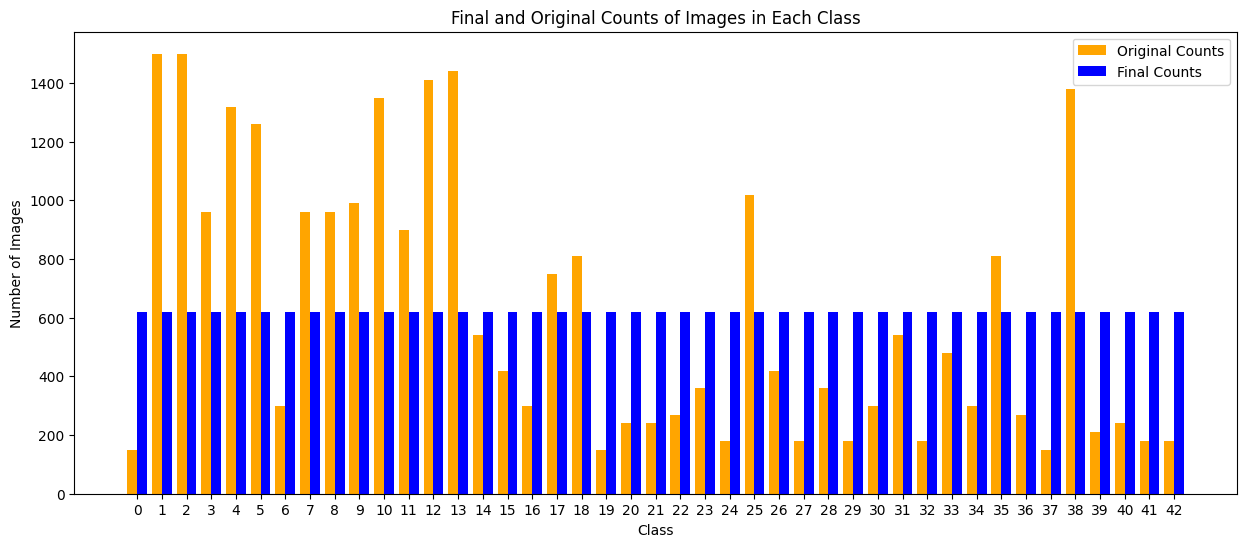

In [ ]:
# Calculate the counts of images in each class for both final and original data
final_class_counts = np.bincount(filtered_labels)
original_class_counts = np.bincount(labels)

# Number of classes
num_classes = len(final_class_counts)

# Create an array of class labels
class_labels = np.arange(num_classes)

# Calculate the bar width and the gap between original and final counts
bar_width = 0.4
gap = 0.2

# Calculate the positions for the bars
original_bar_positions = class_labels * (2 * bar_width + gap) - bar_width / 2
final_bar_positions = class_labels * (2 * bar_width + gap) + bar_width / 2

# Plot the graph
plt.figure(figsize=(15, 6))

# Plot original counts in orange
plt.bar(original_bar_positions, original_class_counts, color='orange', width=bar_width, label='Original Counts')

# Plot final counts in blue
plt.bar(final_bar_positions, final_class_counts, color='blue', width=bar_width, label='Final Counts')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Final and Original Counts of Images in Each Class')
plt.xticks(class_labels * (2 * bar_width + gap), class_labels)  # Adjust xticks positions
plt.legend()
plt.show()


As the training of the model will be done on another instance of collab with GPU, the images will be saved in the Google drive.

Firstly, the files and folder were saved to local instance of colab. A dataframe is created to store the images name and labels.

In [ ]:
# Define the folder path to save the images
save_folder = "/content/augmented_images"
os.makedirs(save_folder, exist_ok=True)

# Save augmented images to the folder
for i, image in enumerate(filtered_images):

    class_label = filtered_labels[i]

    filename = f"{class_label}_{i}.png"
    file_path = os.path.join(save_folder, filename)
    cv2.imwrite(file_path, image)

# Create a list of dictionaries for DataFrame
data = []
for i in range(len(filtered_images)):

    class_label = filtered_labels[i]

    filename = f"{class_label}_{i}.png"
    data.append({"class": class_label, "filename": filename})

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)

print("Images saved and DataFrame created.")

Images saved and DataFrame created.


The size of the images files stored in the local colab instance is checked below. It should be the same as the size of the final images.

In [ ]:
# Specify the directory path
folder_path = '/content/augmented_images'

# List all files in the directory
file_list = os.listdir(folder_path)

# Count the number of files
num_files = len(file_list)

print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 26660


Next, the zip file is created locally and then moved to the Google Drive. The pandas dataframe is then saved to a CSV file directly in the Google Drive.

In [ ]:
shutil.make_archive('/content/augmented_images', 'zip', save_folder)

# Move the zip file to Google Drive
zip_path = '/content/augmented_images.zip'
drive_save_path = '/content/drive/MyDrive/final/train_data/final_image2.zip'
shutil.move(zip_path, drive_save_path)

# Save the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/final/train_data/image_data2.csv", index=False)

print("Images and DataFrame created saved to Google Drive.")

Images and DataFrame created saved to Google Drive.


The training data enhanced with simple filters and image augmentation to at least 620 images per class is now available for use in Google Drive.